<a href="https://colab.research.google.com/github/GeorgievskaEmilija/Data-Science-Lab-Exercises/blob/main/183044_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>

</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Europe_crisis.csv")
data.head()

,Unnamed: 0,CC3,Country,Year,Banking Crisis,Systemic Crisis,exch_usd,National Currency,exch_sources,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
0,0,AUT,Austria,1800.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.00,14.64646464646464,1,1,0.0
1,1,AUT,Austria,1801.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.00,29.24081323858143,1,1,1.0
2,2,AUT,Austria,1802.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,11.554948079807115,1,0,0.0
3,3,AUT,Austria,1803.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,12.448675361157424,1,0,0.0
4,4,AUT,Austria,1804.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,-3.399989463738562,1,1,0.0


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



Таргет вредноста која сакам да ја предивидам е 'Currency Crises' - односно дали валутата на земјата е загрозена според економската состојба во таа година. Оваа вредност може да биде 0 - дека не е загрозена, 1- дека е загрозена, и има уште една вредност 2 која не е дефинирана во описот на множеството, но мислам дека се работи за некој повисок степен на загрозување на валутата.

Visualize the target column

In [ ]:
data['Currency Crises'].value_counts()

0    4203
1     343
2      11
Name: Currency Crises, dtype: int64

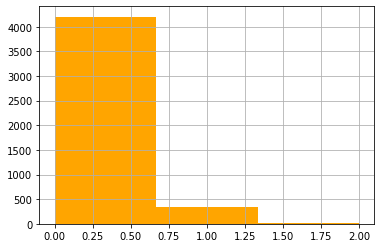

In [ ]:
data['Currency Crises'].hist(bins=3, color='orange')

Moже да се забележи дека поголем дел од вредностите се 0, многу малку се 1, и незначителен број на вредности за 2.

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [ ]:
missing_values = data.isnull().sum()
percentage = 100 * data.isnull().sum() / len(data)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ["Number of missing values", "% of missing values"]
missing_values_table

,Number of missing values,% of missing values
Unnamed: 0,0,0.000000
CC3,0,0.000000
Country,0,0.000000
Year,0,0.000000
Banking Crisis,476,10.445469
Systemic Crisis,12,0.263331
exch_usd,825,18.104016
National Currency,435,9.545754
exch_sources,1,0.021944
Domestic Debt,661,14.505157


Visualize the missing values using Missingno library

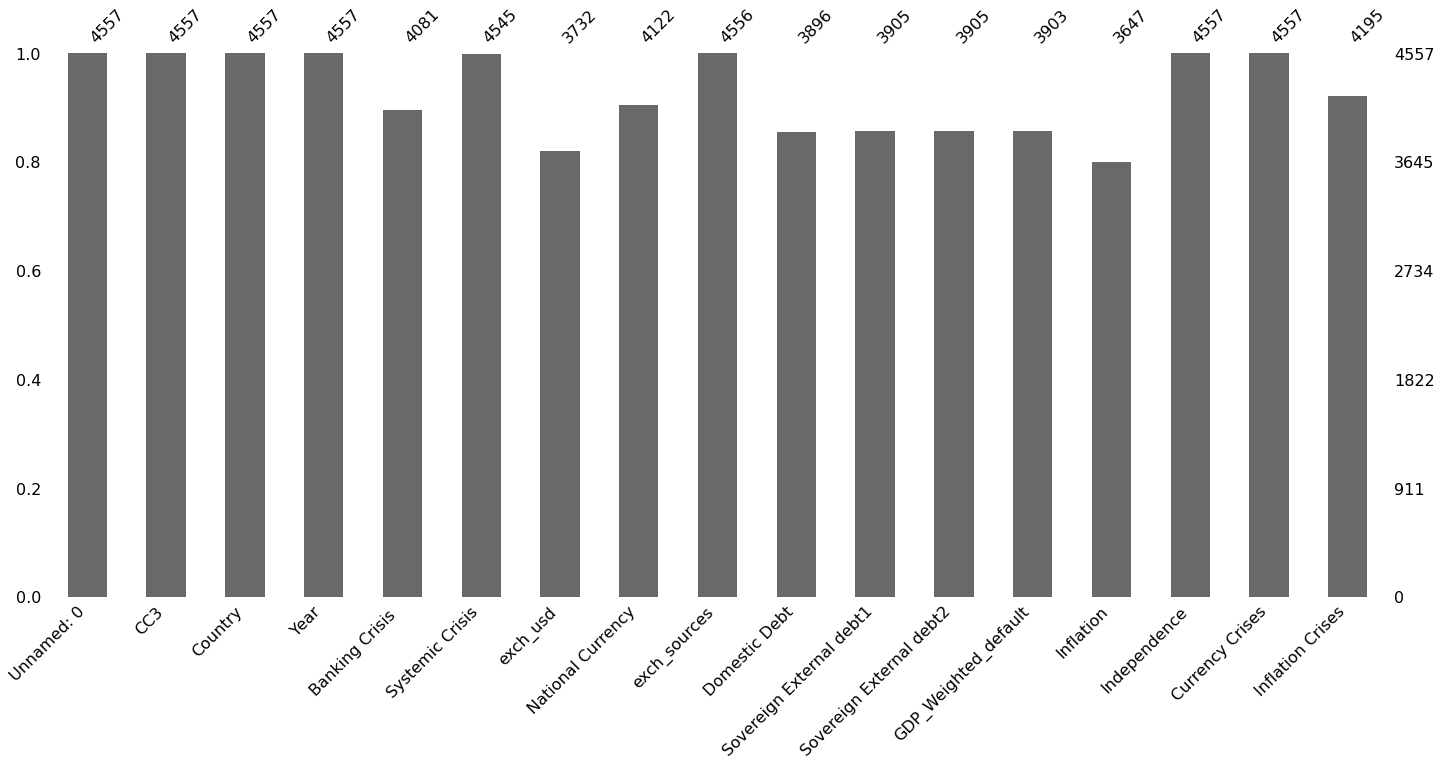

In [ ]:
import missingno as msno
msno.bar(data)

# <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

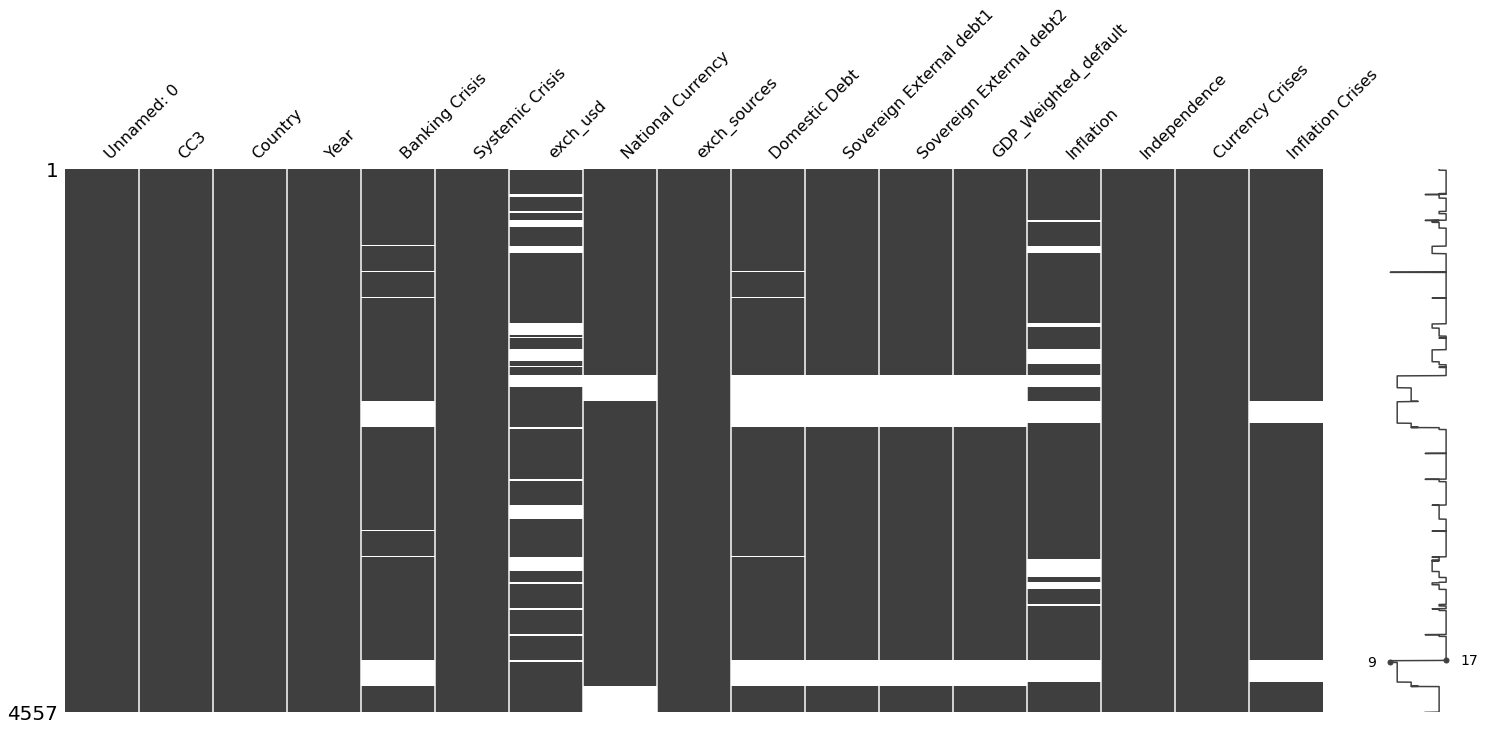

In [ ]:
msno.matrix(data)

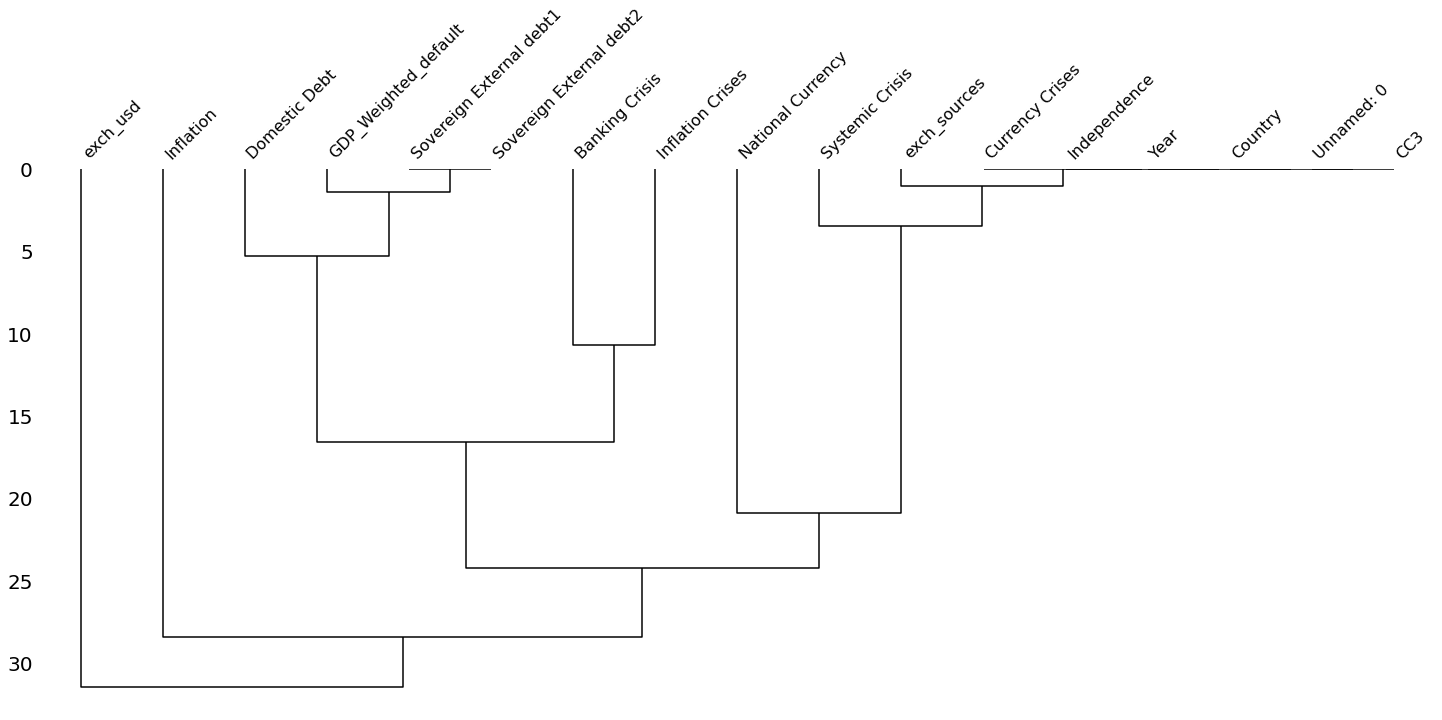

In [ ]:
msno.dendrogram(data)

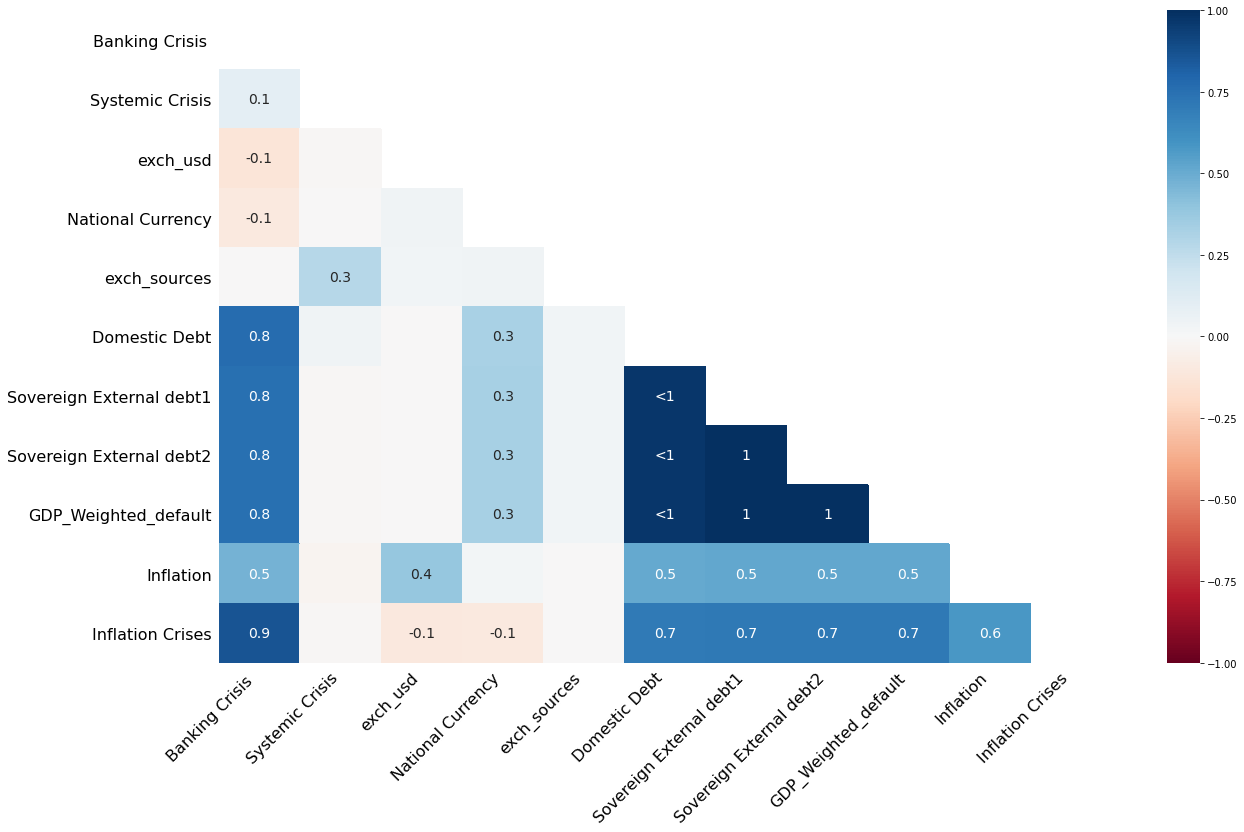

In [ ]:
msno.heatmap(data)

Oд оваа heat-map може да се види дека  има поврзаност меѓу многу од вредностите, каде некои тотално зависат едни од други. На пример Banking Crisis e тесно поврзана со многу  други вредности - како националниот долг, инфлацијата, другите долгови, бруто домашниот производ. Јасно е дека се работи за MNAR - Missing not at Random(Едни податоци кои недостасувааат се резултат на други вредности кои недостасуваат/не се собрани).

# <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


Бидејќи најголем процент на missing values имаме кај инфлацијата, сакаме да ги  предвидиме null вредностите на истата, преку колоните кои се тесно поврзани со оваа колона(тие што не се ги изоставуваме).

In [ ]:
from sklearn.preprocessing import StandardScaler

data1=data.copy()
data1.drop('Systemic Crisis', axis=1, inplace=True)
data1.drop('National Currency', axis=1, inplace=True)
data1.drop('exch_sources', axis=1, inplace=True)
data1.drop('exch_usd', axis=1, inplace=True)
data1.head()

,Unnamed: 0,CC3,Country,Year,Banking Crisis,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
0,0,AUT,Austria,1800.0,0.0,0.0,0,0.0,0.00,14.64646464646464,1,1,0.0
1,1,AUT,Austria,1801.0,0.0,0.0,0,0.0,0.00,29.24081323858143,1,1,1.0
2,2,AUT,Austria,1802.0,0.0,0.0,1,1.0,0.86,11.554948079807115,1,0,0.0
3,3,AUT,Austria,1803.0,0.0,0.0,1,1.0,0.86,12.448675361157424,1,0,0.0
4,4,AUT,Austria,1804.0,0.0,0.0,1,1.0,0.86,-3.399989463738562,1,1,0.0


In [ ]:
missing_values_test = data1.isnull().sum()
percentage_test = 100 * data1.isnull().sum() / len(data1)
missing_values_table_test = pd.concat([missing_values_test, percentage_test], axis=1)
missing_values_table_test.columns = ["Number of missing values", "% of missing values"]
missing_values_table_test

,Number of missing values,% of missing values
Unnamed: 0,0,0.000000
CC3,0,0.000000
Country,0,0.000000
Year,0,0.000000
Banking Crisis,476,10.445469
Domestic Debt,661,14.505157
Sovereign External debt1,652,14.307659
Sovereign External debt2,652,14.307659
GDP_Weighted_default,654,14.351547
Inflation,910,19.969278


In [ ]:
train_target = data1.dropna(subset=['Inflation'])
test_target = data1[data1['Inflation'].isna()]

x_train = train_target[train_target.columns[:12]]
y_train = train_target['Inflation']

x_test = test_target[test_target.columns[:12]]
y_test = test_target['Inflation']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
y_prediction = model.predict(x_test)

n = 0
for i in range(0, len(x_train['Inflation'])):
  if pd.isna(x_train['Inflation'][i]):
    x_train['Inflation'][i] = y_prediction[n]
    n+=1 

Импутација на missing values на останатите колони.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()
datacopy = data1.copy(deep=True)

datacopy['Banking Crisis'] = mice_imputer.fit_transform(datacopy[['Banking Crisis']])
datacopy['Domestic Debt'] = mice_imputer.fit_transform(datacopy[['Domestic Debt']])
datacopy['Sovereign External debt1'] = mice_imputer.fit_transform(datacopy[['Sovereign External debt1']])
datacopy['Sovereign External debt2'] = mice_imputer.fit_transform(datacopy[['Sovereign External debt2']])
datacopy['GDP_Weighted_default'] = mice_imputer.fit_transform(datacopy[['GDP_Weighted_default']])
datacopy['Inflation Crises'] = mice_imputer.fit_transform(train_copy[['Inflation Crises']])
datacopy.head()

# <font color = 'Orange'> Encode non numerical values </font>

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
datacopy['Country'] = le.fit_transform(datacopy['Country'])
datacopy.head()

,Unnamed: 0,CC3,Country,Year,Banking Crisis,Systemic Crisis,exch_usd,National Currency,exch_sources,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
0,0,AUT,0,1800.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.00,14.64646464646464,1,1,0.0
1,1,AUT,0,1801.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.00,29.24081323858143,1,1,1.0
2,2,AUT,0,1802.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,11.554948079807115,1,0,0.0
3,3,AUT,0,1803.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,12.448675361157424,1,0,0.0
4,4,AUT,0,1804.0,0.0,0.0,NaN,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,-3.399989463738562,1,1,0.0


# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [ ]:
#datacopy.to_csv('/content/drive/MyDrive/Colab Notebooks/final.csv', index = false)

Print the first rows of your final Dataset

In [ ]:
#datacopy=pd.read_scv('/content/drive/MyDrive/Colab Notebooks/final.csv')
#datacopy.head()